<a href="https://colab.research.google.com/github/jiho9702/Mnist_recognize_handwriting/blob/main/mnist_handwriting_recognize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
batch_size = 128
num_classes = 10
epochs = 12

img_rows, img_cols = 28, 28

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [37]:
mnist.load_data

<function keras.datasets.mnist.load_data>

In [6]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [7]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        fill_mode='nearest')

In [9]:
model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                    steps_per_epoch=x_train.shape[0] // batch_size,
                    validation_data=(x_test, y_test),
                    epochs=epochs, verbose=2)

score = model.evaluate(x_test, y_test, verbose=2)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


model.save('model.h5')

Epoch 1/12


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


468/468 - 29s - loss: 0.6969 - accuracy: 0.7763 - val_loss: 0.1544 - val_accuracy: 0.9585 - 29s/epoch - 62ms/step
Epoch 2/12
468/468 - 31s - loss: 0.5117 - accuracy: 0.8411 - val_loss: 0.1240 - val_accuracy: 0.9624 - 31s/epoch - 66ms/step
Epoch 3/12
468/468 - 29s - loss: 0.4301 - accuracy: 0.8675 - val_loss: 0.1162 - val_accuracy: 0.9666 - 29s/epoch - 61ms/step
Epoch 4/12
468/468 - 29s - loss: 0.3752 - accuracy: 0.8847 - val_loss: 0.0919 - val_accuracy: 0.9707 - 29s/epoch - 61ms/step
Epoch 5/12
468/468 - 29s - loss: 0.3401 - accuracy: 0.8976 - val_loss: 0.1077 - val_accuracy: 0.9676 - 29s/epoch - 62ms/step
Epoch 6/12
468/468 - 31s - loss: 0.3101 - accuracy: 0.9061 - val_loss: 0.0866 - val_accuracy: 0.9736 - 31s/epoch - 66ms/step
Epoch 7/12
468/468 - 28s - loss: 0.2893 - accuracy: 0.9124 - val_loss: 0.0830 - val_accuracy: 0.9737 - 28s/epoch - 60ms/step
Epoch 8/12
468/468 - 31s - loss: 0.2774 - accuracy: 0.9169 - val_loss: 0.0823 - val_accuracy: 0.9742 - 31s/epoch - 67ms/step
Epoch 9/12


In [25]:
import cv2 as cv
import numpy as np
from tensorflow.keras.models import load_model
from google.colab.patches import cv2_imshow

In [12]:
img_color = cv.imread('test3.jpg', cv.IMREAD_COLOR)
img_gray = cv.cvtColor(img_color, cv.COLOR_BGR2GRAY)

In [16]:
ret,img_binary = cv.threshold(img_gray, 0, 255, cv.THRESH_BINARY_INV | cv.THRESH_OTSU)

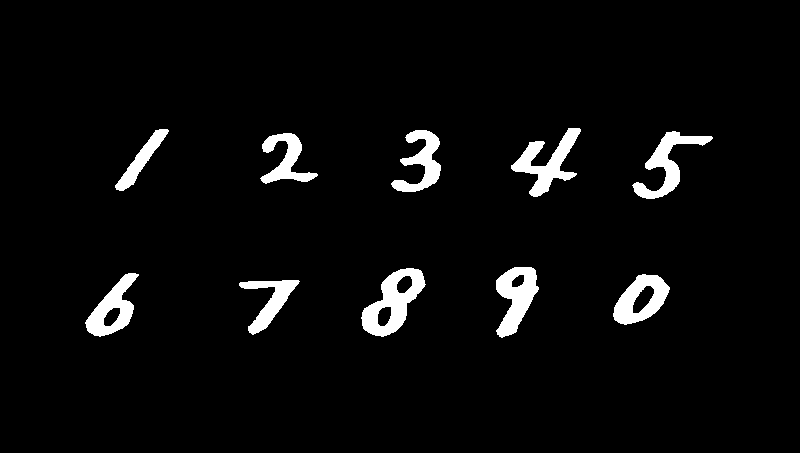

-1

In [27]:
kernel = cv.getStructuringElement( cv.MORPH_RECT, ( 5, 5 ) )
img_binary = cv.morphologyEx(img_binary, cv. MORPH_CLOSE, kernel)

cv2_imshow(img_binary)
cv.waitKey(0)

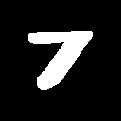

7


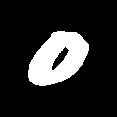

0


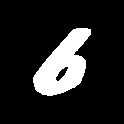

6


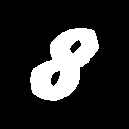

8


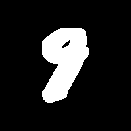

9


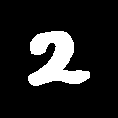

2


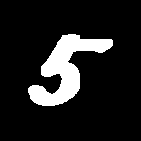

5


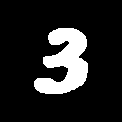

3


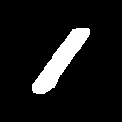

1


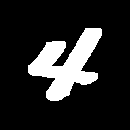

4


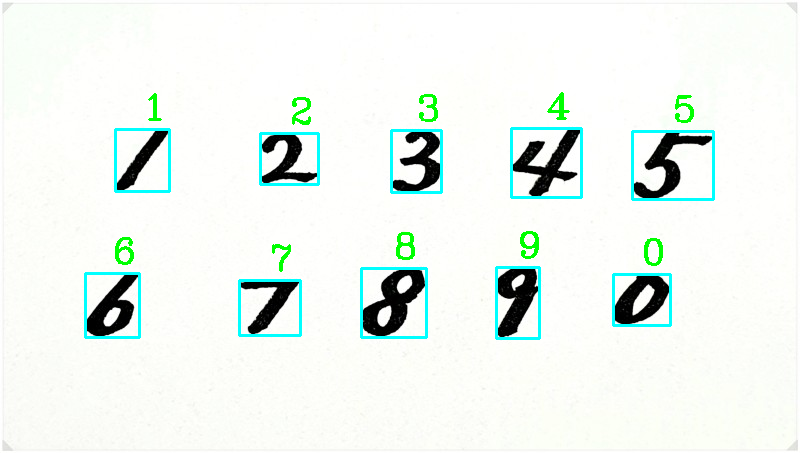

-1

In [33]:
contours, hierarchy = cv.findContours(img_binary, cv.RETR_EXTERNAL, 
                        cv.CHAIN_APPROX_SIMPLE)

for contour in contours:

    x, y, w, h = cv.boundingRect(contour)



    length = max(w, h) + 60
    img_digit = np.zeros((length, length, 1),np.uint8)

    new_x,new_y = x-(length - w)//2, y-(length - h)//2


    img_digit = img_binary[new_y:new_y+length, new_x:new_x+length]

    kernel = np.ones((5, 5), np.uint8)
    img_digit = cv.morphologyEx(img_digit, cv.MORPH_DILATE, kernel)

    cv2_imshow(img_digit)
    cv.waitKey(0)

    model = load_model('model.h5')

    img_digit = cv.resize(img_digit, (28, 28), interpolation=cv.INTER_AREA)

    img_digit = img_digit / 255.0

    img_input = img_digit.reshape(1, 28, 28, 1)
    predictions = model.predict(img_input)


    number = np.argmax(predictions)
    print(number)

    cv.rectangle(img_color, (x, y), (x+w, y+h), (255, 255, 0), 2)


    location = (x + int(w *0.5), y - 10)
    font = cv.FONT_HERSHEY_COMPLEX  
    fontScale = 1.2
    cv.putText(img_color, str(number), location, font, fontScale, (0,255,0), 2)
    

    cv2_imshow(img_digit)
    cv.waitKey(0)
    

cv2_imshow(img_color)
cv.waitKey(0)